# **Machine Learning Assignment2**
## **Spring 2021**
### **By Zeyu Wang**

## 1. [60 points] Random Forest. Load breast cancer dataset that includes 569 examples and 30 features using load_breast_cancer() of load_breast_cancer class in scikit-learn. Divide data into 70% for training and 30% for test dataset. Train your model using random forest algorithm specifically, RandomForestClassifier and get the accuracy for the training and test data respectively using accuracy_score class. The accuracy will be collected with different hyperparameters as follows: A. Number of samples: your model should be trained with different number of samples by adding 10% of samples each time B. Number of features: your model should be trained with different number of features such as {1, 2, 3, 4, 5, 6, 7, 8, 9, 10} C. Number of trees: your model should be trained with different number of trees such as {10, 100, 500, 1,000} Use default values for other hyperparameters when you change the value of each hyperparameters in A, B, and C. Show your accuracy with different hyperparameters in A, B, and C both in number and graph. You can use any type of plotting method for the graph. You can refer and modify the code in random_forest.ipynb covered in the lecture to implement this assignment

In [305]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import re

In [306]:
data_cancer = load_breast_cancer()
x = data_cancer['data']
y = data_cancer['target']

In [307]:
#get columns of breast cancer
cancer_column = pd.read_html('https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset')
columns = cancer_column[3].iloc[:,0]
columns = columns.apply(lambda x: x.split('(')[0])
columns

0                radius 
1               texture 
2             perimeter 
3                  area 
4            smoothness 
5           compactness 
6             concavity 
7        concave points 
8              symmetry 
9     fractal dimension 
10               radius 
11              texture 
12            perimeter 
13                 area 
14           smoothness 
15          compactness 
16            concavity 
17       concave points 
18             symmetry 
19    fractal dimension 
20               radius 
21              texture 
22            perimeter 
23                 area 
24           smoothness 
25          compactness 
26            concavity 
27       concave points 
28             symmetry 
29    fractal dimension 
Name: Unnamed: 0, dtype: object

In [308]:
data = pd.DataFrame(x, columns = columns)
data['target'] = y
data

Unnamed: 0,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,...,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [309]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [310]:
clf = RandomForestClassifier()
cancer_RandomForestClassifier = clf.fit(X_train, y_train)

In [311]:
y_hat = cancer_RandomForestClassifier.predict(X_test)

In [312]:
accuracy_score(y_test, y_hat)

0.9707602339181286

### 1.1 different number of samples

In [313]:
n = int(len(X_train)/10)
accuracy_different_sample = []
for i in range(10):
    clf = RandomForestClassifier()
    cancer_RandomForestClassifier = clf.fit(X_train[:(i+1)*n], y_train[:(i+1)*n])
    y_hat = cancer_RandomForestClassifier.predict(X_test)
    accuracy_s = accuracy_score(y_test, y_hat)
    print(f'When sample number = {(i+1)*n}, accuracy = {accuracy_s}')
    accuracy_different_sample.append(accuracy_s)

When sample number = 39, accuracy = 0.9590643274853801
When sample number = 78, accuracy = 0.9707602339181286
When sample number = 117, accuracy = 0.9649122807017544
When sample number = 156, accuracy = 0.9766081871345029
When sample number = 195, accuracy = 0.9766081871345029
When sample number = 234, accuracy = 0.9707602339181286
When sample number = 273, accuracy = 0.9707602339181286
When sample number = 312, accuracy = 0.9707602339181286
When sample number = 351, accuracy = 0.9707602339181286
When sample number = 390, accuracy = 0.9707602339181286


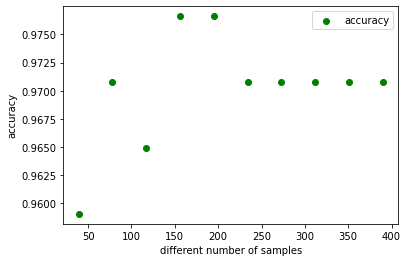

In [314]:
xx = [(i+1)*n for i in range(10)]
plt.figure()
plt.scatter(xx,accuracy_different_sample,marker='o', c='g',label = 'accuracy')
plt.xlabel("different number of samples")
plt.ylabel("accuracy")
plt.legend()
plt.show();

In [315]:
y_train[:2]

array([0, 1])

### 1.2 different number of features

In [316]:
n_feature = [i+1 for i in range(30)]
accuracy_different_features = []
for i in n_feature:
    clf = RandomForestClassifier()
    cancer_RandomForestClassifier = clf.fit(X_train[:,:i], y_train)
    y_hat = cancer_RandomForestClassifier.predict(X_test[:,:i])
    accuracy_s = accuracy_score(y_test, y_hat)
    print(f'When number of features = {i}, accuracy score = {accuracy_s}')
    accuracy_different_features.append(accuracy_s)

When number of features = 1, accuracy score = 0.847953216374269
When number of features = 2, accuracy score = 0.8947368421052632
When number of features = 3, accuracy score = 0.9005847953216374
When number of features = 4, accuracy score = 0.9181286549707602
When number of features = 5, accuracy score = 0.9239766081871345
When number of features = 6, accuracy score = 0.935672514619883
When number of features = 7, accuracy score = 0.9590643274853801
When number of features = 8, accuracy score = 0.9590643274853801
When number of features = 9, accuracy score = 0.9473684210526315
When number of features = 10, accuracy score = 0.9473684210526315
When number of features = 11, accuracy score = 0.9473684210526315
When number of features = 12, accuracy score = 0.9415204678362573
When number of features = 13, accuracy score = 0.9532163742690059
When number of features = 14, accuracy score = 0.9473684210526315
When number of features = 15, accuracy score = 0.9590643274853801
When number of featur

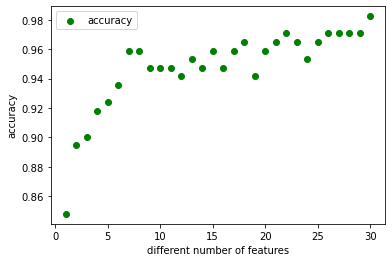

In [317]:
xx = [(i+1)*n for i in range(10)]
plt.figure()
plt.scatter(n_feature,accuracy_different_features,marker='o', c='g',label = 'accuracy')
plt.xlabel("different number of features")
plt.ylabel("accuracy")
plt.legend()
plt.show();

### 1.3 different number of trees

In [320]:
tress = [10, 100, 200, 500, 1000]
accuracy_different_tress = []
for i in tress:
    clf = RandomForestClassifier(n_estimators = i)
    cancer_RandomForestClassifier = clf.fit(X_train, y_train)
    y_hat = cancer_RandomForestClassifier.predict(X_test)
    accuracy_s = accuracy_score(y_test, y_hat)
    #print(f'When number of tress={i}, the accuracy = {accuracy_s}')
    accuracy_different_tress.append(accuracy_s)

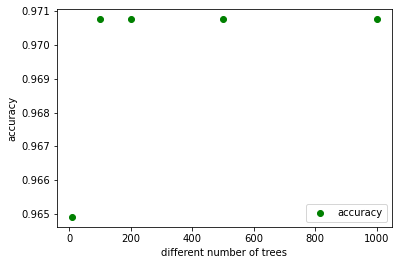

In [321]:
xx = [(i+1)*n for i in range(10)]
plt.figure()
plt.scatter(tress,accuracy_different_tress,marker='o', c='g',label = 'accuracy')
plt.xlabel("different number of trees")
plt.ylabel("accuracy")
plt.legend()
plt.show();

## 2. [60 points] K-Nearest Neighbors. Download automobile dataset from ‘https://archive.ics.uci.edu/ml/machine-learning-databases/ autos/imports- 85.data’ using read_csv function from pandas and implement a recommender system with K-Nearest Neighbors algorithm. Find the information about the data at https://archive.ics.uci.edu/ml/datasets/Automobile. Use the def knn(data, query, k, distance_fn, choice_fn), def mean(labels), def mode(labels), def euclidean_distance(point1, point2) functions given in the class (knn.ipynb). You can modify the code in knn.ipynb to implement this assignment. Your program should be able to show k recommended autos with 26 attributes according to a query. In this assignment, use k = 5 and 10, query = {1, 100, bmw, gas, std, four, sedan, fwd, front, 100.0, 170.0, 65.0, 50.0, 2000, rotor, four, 200, mfi, 3.0, 3.0, 15, 200, 5000, 23, 27, 30000}.

In [322]:
columns = pd.read_html('https://archive.ics.uci.edu/ml/datasets/Automobile')

In [323]:
data_automobile = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')

In [324]:
r = requests.get('https://github.com/NewThread-ZY/AIM-5005-100/blob/main/UCI%20Machine%20Learning%20Repository_%20Automobile%20Data%20Set.html')
pattern = r'[0-9]{1,2}\.\s[a-zA-Z\-]+'
colu = re.findall(pattern, r.text)
pattern2 = r'[a-zA-Z\-]+'
columns = re.findall(pattern2, ''.join(colu))
df_auto = pd.DataFrame(data_automobile)
df_auto.columns = columns
df_auto_1 = df_auto.replace('?', -10000)
df_auto_1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,-10000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,-10000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,-10000,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [325]:
def knn(data, query, k, distance_fn):
    neighbor_distance_and_indices = []
    for index, example in enumerate(data):
        distance = distance_fn(example, query)
        neighbor_distance_and_indices.append((distance, index))
    sorted_neighbor_distances_and_indics = sorted(neighbor_distance_and_indices)
    k_nearest_distance_and_indices = sorted_neighbor_distances_and_indics
    return k_nearest_distance_and_indices[0:k]

In [359]:
def Euclidean(point1, point2):
    '''
    In this function, it needs two points to calculate the Euclidean distance.
    If the data isn't digited and doesn't equal, we give it scores 50 to distance them because maybe they are nan or difference type. 
    We can use values to control the weight of the non_value data such as the different brands.
    '''
    distance = 0
    for i in range(len(point1)):
        if point1.isdigit():
            distance += [point1[i]-point2[i]]**2
        else:
            if point1[i]==point2[i]:
                distance+=0
            else:
                distance += 50
    return distance

In [327]:
#k=5 
k=5
query = [1, 100, 'bmw', 'gas', 'std', 'four', 'sedan', 'fwd', 'front', 100.0, 170.0, 65.0, 50.0, 2000, 'rotor', 'four', 200, 'mfi', 3.0, 3.0, 15, 200, 5000, 23, 27, 30000]
car_recomment = knn(df_auto_1, query, k, distance_fn=Euclidean)
index = [i for dis,i in car_recomment]

In [328]:
df_auto_1.iloc[index,:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
18,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295
11,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


In [329]:
#k=10
k=10
query = [1, 100, 'bmw', 'gas', 'std', 'four', 'sedan', 'fwd', 'front', 100.0, 170.0, 65.0, 50.0, 2000, 'rotor', 'four', 200, 'mfi', 3.0, 3.0, 15, 200, 5000, 23, 27, 30000]
car_recomment = knn(df_auto_1, query, k, distance_fn=Euclidean)
index = [i for dis,i in car_recomment]
df_auto_1.iloc[index,:]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
18,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6295
11,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
25,1,148,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,7609
10,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
12,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105
19,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,6575
22,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
23,1,148,dodge,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229
0,3,-10000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


## 3. [30 points] Naïve-Bayes Classifier. Implement a model that trains toy examples covered in the lecture using Naïve-Bayes classifier. The toy examples have two features including color = {‘blue’, ‘green’, ‘red’, ‘yellow’} and shape = {‘circle’, ‘square’} and two labels including ‘+’ and ‘–‘ Use examples below and build three lists for the training data set as follows: color=['red','blue','green','blue','blue','blue','red','green','green','blue','blue','red' ] shape=['square','circle','square','square','square','circle','square','circle','square',' circle','square','square'] label=['plus','plus','plus','minus','minus','plus','plus','minus','plus','minus','plus',' minus'] Once your model is trained, try {blue, square} and {yellow, square} to predict whether it is ‘+’ or ‘–‘.

In [330]:
color=['red','blue','green','blue','blue','blue','red','green','green','blue','blue','red' ] 
shape=['square','circle','square','square','square','circle','square','circle','square',' circle','square','square'] 
label=['plus','plus','plus','minus','minus','plus','plus','minus','plus','minus','plus',' minus']

In [331]:
df_toy = pd.DataFrame({'color':color, 'shape':shape, 'label':label})
df_toy

,color,shape,label
0,red,square,plus
1,blue,circle,plus
2,green,square,plus
3,blue,square,minus
4,blue,square,minus
5,blue,circle,plus
6,red,square,plus
7,green,circle,minus
8,green,square,plus
9,blue,circle,minus


In [332]:
a = df_toy[df_toy['label']=='plus'].copy()
len(a[a['color'] == 'blue'])

3

In [333]:
class Naïve_Bayes_toys:
    def fit(self, data):
        a = 0.5
        ad = 0.5*2
        self.a = a
        self.ad = ad
        self.plus = len(data[data['label']=='plus'])+a/len(data)+ad
        self.minus = len(data[data['label']=='minus'])+a/len(data)+ad
        dataplus = data[data['label']=='plus'].copy()
        self.blue_plus = len(dataplus[dataplus['color'] == 'blue'])+a/len(dataplus)+ad
        self.red_plus = len(dataplus[dataplus['color'] == 'red'])+a/len(dataplus)+ad
        self.green_plus = len(dataplus[dataplus['color'] == 'green'])+a/len(dataplus)+ad
        
        dataminus = data[data['label']=='minus'].copy()
        self.blue_minus = len(dataminus[dataminus['color'] == 'blue'])+a/len(dataminus)+ad
        self.red_minus = len(dataminus[dataminus['color'] == 'red'])+a/len(dataminus)+ad
        self.green_minus = len(dataminus[dataminus['color'] == 'green'])+a/len(dataminus)+ad
        
        self.square_plus = len(dataplus[dataplus['shape'] == 'square'])+a/len(dataplus)+ad
        self.circle_plus = len(dataplus[dataplus['shape'] == 'circle'])+a/len(dataplus)+ad

        self.square_minus = len(dataminus[dataminus['shape'] == 'square'])+a/len(dataminus)+ad
        self.circle_minus = len(dataminus[dataminus['shape'] == 'circle'])+a/len(dataminus)+ad
        
        self.dataplus = dataplus
        self.dataminus = dataminus
    def predict(self, color, shape):
        a = self.a
        ad = self.ad
        if shape == 'square':
            if color == 'blue':
                plusr = self.blue_plus*self.square_plus*self.plus
                minusr = self.blue_minus*self.square_minus*self.minus
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
            elif color == 'red':
                plusr = self.red_plus*self.square_plus*self.plus
                minusr = self.red_minus*self.square_minus*self.minus
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
            elif color == 'green':
                plusr = self.green_plus*self.square_plus*self.plus
                minusr = self.green_minus*self.square_minus*self.minus
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
            else:
                plusr = (0+a)/len(self.dataplus)+ad
                minusr = (0+a)/len(self.dataminus)+ad
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
        elif shape == 'circle':
            
            if color == 'blue':
                plusr = self.blue_plus*self.circle_plus*self.plus
                minusr = self.blue_minus*self.circle_minus*self.minus
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
            elif color == 'red':
                plusr = self.red_plus*self.circle_plus*self.plus
                minusr = self.red_minus*self.circle_minus*self.minus
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
            elif color == 'green':
                plusr = self.green_plus*self.circle_plus*self.plus
                minusr = self.green_minus*self.circle_minus*self.minus
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
            else:
                plusr = (0+int(a))/len(self.dataplus)+ad
                minusr = (0+a)/len(self.dataminus)+ad
                if plusr>minusr:
                    return 'plus'
                else:
                    return 'minus'
        else:
            plusr = (0+a)/len(self.dataplus)+ad
            minusr = (0+a)/len(self.dataminus)+ad
            if plusr>minusr:
                return 'plus'
            else:
                return 'minus'

In [334]:
Bayes_toys = Naïve_Bayes_toys
Bayes_toys.fit(Bayes_toys, data = df_toy)

In [335]:
Bayes_toys.predict(Bayes_toys, 'blue', 'square')

'plus'

In [336]:
Bayes_toys.predict(Bayes_toys, 'yellow', 'square')

'minus'

## 4. [60 points] Principal Component Analysis. Download heart failure clinical records dataset from ‘https://archive.ics.uci.edu/ml/machine-learning- databases/ 00519/heart_failure_clinical_records_dataset.csv’ using read_csv function from pandas and split the data into 70% training and 30% test subsets. Find the information about the data at https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records. After standardizing the data, perform eigendecomposition of the covariance matrix to use the total and explained variance to use the top 60% of variance. Before selecting 60% of principal components (PCs), sort the eigenvalues in decreasing order and then choose the first PCs around 60%. Transform the data using transformation matrix and train the data using LogisticRegression with default arguments. Find the accuracy for the test dataset both when the PCA is applied and when the PCA is not applied. Measure the accuracy by increasing the number of PCs from 60% to 70%, 80% and 90%. You can use the code (ch05.ipynb) covered in the lecture and modify it to implement this assignment.

In [337]:
column = ['age',
 'anaemia',
 'high blood pressure',
 'creatinine phosphokinase (CPK)',
 'diabetes',
 'ejection fraction',
 'platelets',
 'sex',
 'serum creatinine',
 'serum sodium',
 'smoking',
 'time',
 'target' ]

In [338]:
df_heart = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv')
df_heart.columns = column

In [339]:
df_heart

,age,anaemia,high blood pressure,creatinine phosphokinase (CPK),diabetes,ejection fraction,platelets,sex,serum creatinine,serum sodium,smoking,time,target
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [340]:
X_train, X_test, y_train, y_test = train_test_split(df_heart.iloc[:,:-1], df_heart.iloc[:,-1], test_size=0.3, random_state=5)

In [341]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std_data = sc.transform(X_train)
X_train_std_data

array([[-0.90116512, -0.83617402,  1.39521011, ...,  0.70964577,
         1.35067551, -0.10726803],
       [ 1.53431094,  1.19592331, -0.55386118, ...,  0.70964577,
        -0.74037028, -0.64700951],
       [-1.57302058, -0.83617402, -0.54406686, ...,  0.70964577,
        -0.74037028,  1.55144969],
       ...,
       [ 0.35856388,  1.19592331, -0.49074218, ..., -1.40915375,
        -0.74037028, -0.43637869],
       [-1.74098445, -0.83617402, -0.34818029, ..., -1.40915375,
        -0.74037028,  0.61677542],
       [-1.74098445,  1.19592331, -0.50380128, ..., -1.40915375,
        -0.74037028,  0.78791296]])

In [342]:
sc = StandardScaler()
sc.fit(X_test)
X_test_std_data = sc.transform(X_test)
X_test_std_data

array([[-0.93881771,  1.04547753, -0.03853915, ..., -1.25356634,
        -0.56879646,  0.60303313],
       [-1.61702694,  1.04547753, -0.3475971 , ..., -1.25356634,
        -0.56879646, -0.90109669],
       [ 1.18058611, -0.95650071, -0.03853915, ..., -1.25356634,
        -0.56879646, -1.42319133],
       ...,
       [ 0.07849612, -0.95650071, -0.31873928, ..., -1.25356634,
        -0.56879646, -0.36657121],
       [-0.26060849,  1.04547753, -0.39414197, ..., -1.25356634,
        -0.56879646, -0.41629451],
       [-0.09105618,  1.04547753, -0.53656927, ...,  0.79772404,
         1.75809815, -0.80165009]])

In [343]:
cov_mat = np.cov(X_train_std_data.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[1.68872236 1.60119076 1.36954558 0.48383989 1.14378979 1.07487992
 0.62327966 0.78166516 0.75273552 0.7229352  0.90500954 0.91009892]


In [344]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [345]:
len(var_exp)

12

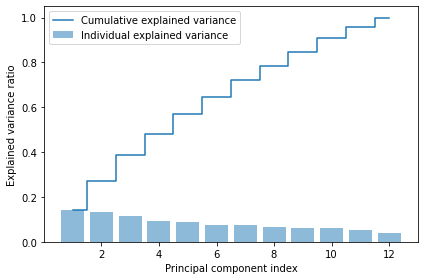

In [346]:
plt.bar(range(1, 13), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 13), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

In [347]:
# top 5 can have around 60%
eigen_val = sorted(eigen_vals, reverse=True)
eigen_val

[1.6887223577964467,
 1.6011907622590777,
 1.3695455844060311,
 1.1437897887351567,
 1.0748799198735353,
 0.9100989186300826,
 0.9050095355269064,
 0.7816651617704176,
 0.7527355196761658,
 0.7229352023304373,
 0.6232796637244088,
 0.48383989296363106]

In [348]:
sorted_indices = np.argsort(eigen_vals)
eigen_vec = eigen_vecs[:,sorted_indices[:-6:-1]]
eigen_vec

array([[-0.03555141, -0.52413707,  0.15429229,  0.01662511,  0.09305617],
       [ 0.32612405, -0.30693509, -0.00756719, -0.1801939 , -0.311109  ],
       [-0.12549456,  0.17766049, -0.11121323, -0.29252542,  0.74674851],
       [ 0.13852363,  0.11350684, -0.46385049,  0.41448021, -0.00497526],
       [ 0.36474867, -0.01510669,  0.36620797, -0.22512519,  0.19283478],
       [ 0.16845473, -0.30307206,  0.35786409,  0.34850394,  0.01323077],
       [ 0.02276252,  0.18095544,  0.13829618,  0.67203589,  0.26465548],
       [-0.02560418, -0.34495316, -0.29308112, -0.13366187,  0.23481352],
       [ 0.19627447,  0.30656734,  0.52497997, -0.07963798,  0.11757029],
       [-0.60278299, -0.10777233,  0.15855555, -0.09517601, -0.07755797],
       [-0.54073385, -0.0337841 ,  0.28386923,  0.14094667, -0.08784113],
       [-0.02418959,  0.48586615,  0.00938245, -0.1816262 , -0.38314404]])

In [349]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [350]:
eigen_pairs

[(1.6887223577964467,
  array([-0.03555141,  0.32612405, -0.12549456,  0.13852363,  0.36474867,
          0.16845473,  0.02276252, -0.02560418,  0.19627447, -0.60278299,
         -0.54073385, -0.02418959])),
 (1.6011907622590777,
  array([-0.52413707, -0.30693509,  0.17766049,  0.11350684, -0.01510669,
         -0.30307206,  0.18095544, -0.34495316,  0.30656734, -0.10777233,
         -0.0337841 ,  0.48586615])),
 (1.3695455844060311,
  array([ 0.15429229, -0.00756719, -0.11121323, -0.46385049,  0.36620797,
          0.35786409,  0.13829618, -0.29308112,  0.52497997,  0.15855555,
          0.28386923,  0.00938245])),
 (1.1437897887351567,
  array([ 0.01662511, -0.1801939 , -0.29252542,  0.41448021, -0.22512519,
          0.34850394,  0.67203589, -0.13366187, -0.07963798, -0.09517601,
          0.14094667, -0.1816262 ])),
 (1.0748799198735353,
  array([ 0.09305617, -0.311109  ,  0.74674851, -0.00497526,  0.19283478,
          0.01323077,  0.26465548,  0.23481352,  0.11757029, -0.07755797

In [351]:
eigen_pairs[0][1][:, np.newaxis]

array([[-0.03555141],
       [ 0.32612405],
       [-0.12549456],
       [ 0.13852363],
       [ 0.36474867],
       [ 0.16845473],
       [ 0.02276252],
       [-0.02560418],
       [ 0.19627447],
       [-0.60278299],
       [-0.54073385],
       [-0.02418959]])

In [352]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
              eigen_pairs[2][1][:, np.newaxis],
              eigen_pairs[3][1][:, np.newaxis],
              eigen_pairs[4][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.03555141 -0.52413707  0.15429229  0.01662511  0.09305617]
 [ 0.32612405 -0.30693509 -0.00756719 -0.1801939  -0.311109  ]
 [-0.12549456  0.17766049 -0.11121323 -0.29252542  0.74674851]
 [ 0.13852363  0.11350684 -0.46385049  0.41448021 -0.00497526]
 [ 0.36474867 -0.01510669  0.36620797 -0.22512519  0.19283478]
 [ 0.16845473 -0.30307206  0.35786409  0.34850394  0.01323077]
 [ 0.02276252  0.18095544  0.13829618  0.67203589  0.26465548]
 [-0.02560418 -0.34495316 -0.29308112 -0.13366187  0.23481352]
 [ 0.19627447  0.30656734  0.52497997 -0.07963798  0.11757029]
 [-0.60278299 -0.10777233  0.15855555 -0.09517601 -0.07755797]
 [-0.54073385 -0.0337841   0.28386923  0.14094667 -0.08784113]
 [-0.02418959  0.48586615  0.00938245 -0.1816262  -0.38314404]]


In [353]:
X_train_std_pca = X_train_std_data.dot(w)
X_train_std_pca

array([[-1.60499536,  1.30540639, -0.6364196 ,  0.20581174,  0.96128795],
       [ 0.66829477, -2.62709785,  0.75464129, -0.76137881, -0.44947111],
       [-0.25968635,  2.15962004,  0.36894619, -1.27029969, -1.12371618],
       ...,
       [ 2.88812597, -0.65756455,  0.64930575,  0.21839982, -0.19876161],
       [ 1.53595766,  1.51624327,  0.93627098,  0.21577798, -0.1000022 ],
       [ 1.74866279,  1.59195901,  0.12030248, -1.0952154 , -1.14262233]])

In [354]:
# 60%pca
clf = LogisticRegression(random_state=0).fit(X_train_std_pca, y_train)
X_test_std_data1 = X_test_std_data[:,sorted_indices[:-6:-1]]
y_pre = clf.predict(X_test_std_data1)
print(f'When choose 60% pcs, accuracy for test data = {len(y_test[y_test == y_pre])/len(y_test)}')

When choose 60% pcs, accuracy for test data = 0.5666666666666667


In [355]:
# without pca
clf = LogisticRegression(random_state=0).fit(X_train_std_data, y_train)
y_pre = clf.predict(X_test_std_data)
print(f'When without choose pcs, accuracy for test data = {len(y_test[y_test == y_pre])/len(y_test)}')

When without choose pcs, accuracy for test data = 0.8222222222222222


In [356]:
#70% pca
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
              eigen_pairs[2][1][:, np.newaxis],
              eigen_pairs[3][1][:, np.newaxis],
              eigen_pairs[4][1][:, np.newaxis],
              eigen_pairs[5][1][:, np.newaxis]))
X_train_std_pca = X_train_std_data.dot(w)
X_train_std_pca
clf = LogisticRegression(random_state=0).fit(X_train_std_pca, y_train)
X_test_std_data1 = X_test_std_data[:,sorted_indices[:-7:-1]]
y_pre = clf.predict(X_test_std_data1)
print(f'When choose 70% pcs, accuracy for test data = {len(y_test[y_test == y_pre])/len(y_test)}')

When choose 70% pcs, accuracy for test data = 0.5888888888888889


In [357]:
#80% pca
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
              eigen_pairs[2][1][:, np.newaxis],
              eigen_pairs[3][1][:, np.newaxis],
              eigen_pairs[4][1][:, np.newaxis],
              eigen_pairs[5][1][:, np.newaxis],
              eigen_pairs[6][1][:, np.newaxis],
              eigen_pairs[7][1][:, np.newaxis]))
X_train_std_pca = X_train_std_data.dot(w)
X_train_std_pca
clf = LogisticRegression(random_state=0).fit(X_train_std_pca, y_train)
X_test_std_data1 = X_test_std_data[:,sorted_indices[:-9:-1]]
y_pre = clf.predict(X_test_std_data1)
print(f'When choose 70% pcs, accuracy for test data = {len(y_test[y_test == y_pre])/len(y_test)}')

When choose 70% pcs, accuracy for test data = 0.6222222222222222


In [358]:
#90% pca
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
              eigen_pairs[2][1][:, np.newaxis],
              eigen_pairs[3][1][:, np.newaxis],
              eigen_pairs[4][1][:, np.newaxis],
              eigen_pairs[5][1][:, np.newaxis],
              eigen_pairs[6][1][:, np.newaxis],
              eigen_pairs[7][1][:, np.newaxis],
              eigen_pairs[8][1][:, np.newaxis],
              eigen_pairs[9][1][:, np.newaxis]))
X_train_std_pca = X_train_std_data.dot(w)
X_train_std_pca
clf = LogisticRegression(random_state=0).fit(X_train_std_pca, y_train)
X_test_std_data1 = X_test_std_data[:,sorted_indices[:-11:-1]]
#y_pre = clf.predict(X_test_std_data1)
score = clf.score(X_test_std_data1, y_test)
print(f'When choose 70% pcs, accuracy for test data = {score}')

When choose 70% pcs, accuracy for test data = 0.6222222222222222
